In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
## Data import

#file_path = 'SeoulBikeData.csv'
file_path = '/content/SeoulBikeData.csv'

try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='cp1252')

print(df.head())
print(len(df))

         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   


We begin by creating a test, val, train split. We decide to first try a single hold out set validation approach. We go with 75 train, 15 val, 10 test

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
features = df.drop(columns=['Rented Bike Count', 'Date', 'Functioning Day'])
labels = df['Rented Bike Count']

In [7]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'categorical_columns' is a list of column names with categorical data
categorical_columns = ['Seasons', 'Holiday']  # Replace with your column names

# Apply label encoding to each categorical column
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    features[col] = label_encoders[col].fit_transform(features[col])


In [8]:
train_ratio = 0.70
val_ratio = 0.20
test_ratio = 0.10

X_train, X_, Y_train, Y_ = train_test_split(features, labels, test_size=test_ratio, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_, Y_, test_size=val_ratio/(1-test_ratio), random_state=42)


In [9]:
print(len(X_train))
print(len(X_test))
print(len(X_val))

7884
195
681


Must change none numerical columns to numberical labels

In [10]:
### given pred and ground truth, develops residual plots, R_sq calcs, and MAE
def get_metrics(pred, actual, tree):
  return False

In [11]:
## return MAE given pred and actual
def get_MAE(pred, actual):
  return sum(abs(np.array(pred) - np.array(actual)))/len(pred)

print(get_MAE([1,2,3], [1,2,3]))

0.0


In [12]:
## get the accuracy where we define accuracy as a prediction within k% of the actual
def get_acc(pred, actual, k):
  return [1 if abs(pred[i]-actual[i])/actual[i] <= k else 0 for i in range(len(pred))]
  #([1 if (pred[i]*(1+k) >= actual[i] and pred[i]*(1-k) <= actual[i]) else 0 for i in range(len(pred))])

get_acc([1,1.52], [1,1], .51)
get_acc([1,1.51], [1,1], .51)
get_acc([-1,.51], [1,1], .51)
get_acc([-1,.52], [1,1], .51)

[0, 1]

Simple decision tree with all features

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

decision_tree_full = DecisionTreeRegressor(random_state=2489)

decision_tree_full.fit(X_train, Y_train)

cross_val_score(decision_tree_full, X_train, Y_train, cv=10)

pred = decision_tree_full.predict(X_val)

We see potential overfitting. Implementing some constraints may help

In [14]:
print(f'R_sq on validation set {decision_tree_full.score(X_val, Y_val)}')
print(f'R_sq on training set {decision_tree_full.score(X_train, Y_train)}')
print(f'Mean Absolute Error on validation set: {get_MAE(pred, Y_val)}')

R_sq on validation set 0.6566516148305881
R_sq on training set 1.0
Mean Absolute Error on validation set: 222.3259911894273


(array([  1.,   0.,   0.,   1.,   1.,   5.,   6.,   6.,  10.,  11.,  21.,
         31.,  64., 260., 162.,  47.,  21.,  11.,   2.,   6.,   7.,   4.,
          2.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([-2163.        , -2006.96666667, -1850.93333333, -1694.9       ,
        -1538.86666667, -1382.83333333, -1226.8       , -1070.76666667,
         -914.73333333,  -758.7       ,  -602.66666667,  -446.63333333,
         -290.6       ,  -134.56666667,    21.46666667,   177.5       ,
          333.53333333,   489.56666667,   645.6       ,   801.63333333,
          957.66666667,  1113.7       ,  1269.73333333,  1425.76666667,
         1581.8       ,  1737.83333333,  1893.86666667,  2049.9       ,
         2205.93333333,  2361.96666667,  2518.        ]),
 <BarContainer object of 30 artists>)

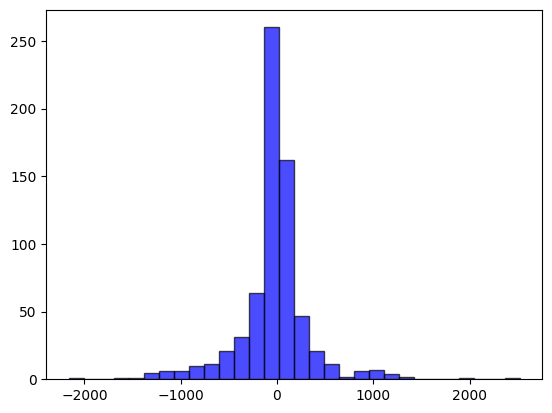

In [15]:
plt.hist(pred - Y_val, bins=30, alpha=0.7, color='blue', edgecolor='black')

Histogram of % error

5366    0.015369
1147    0.233333
5705   -0.075323
7518   -0.147392
2692    0.032609
          ...   
6152    0.105972
7550    0.009082
8476    0.329545
828    -0.027586
6266   -0.474632
Name: Rented Bike Count, Length: 681, dtype: float64


(array([ 27.,  14.,  24.,  41.,  63.,  88., 142.,  92.,  60.,  30.,  16.,
         11.,   4.,   6.,   7.,   5.,   1.,   2.,   2.,   1.,   2.,   1.,
          0.,   0.,   1.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,   0.,
          1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   2.,   0.,
          0.,   0.,   1.,   0.,   0.]),
 array([-1.  , -0.85, -0.7 , -0.55, -0.4 , -0.25, -0.1 ,  0.05,  0.2 ,
         0.35,  0.5 ,  0.65,  0.8 ,  0.95,  1.1 ,  1.25,  1.4 ,  1.55,
         1.7 ,  1.85,  2.  ,  2.15,  2.3 ,  2.45,  2.6 ,  2.75,  2.9 ,
         3.05,  3.2 ,  3.35,  3.5 ,  3.65,  3.8 ,  3.95,  4.1 ,  4.25,
         4.4 ,  4.55,  4.7 ,  4.85,  5.  ,  5.15,  5.3 ,  5.45,  5.6 ,
         5.75,  5.9 ,  6.05,  6.2 ,  6.35,  6.5 ,  6.65,  6.8 ,  6.95,
         7.1 ,  7.25,  7.4 ,  7.55,  7.7 ,  7.85,  8.  ]),
 <BarContainer object of 60 artists>)

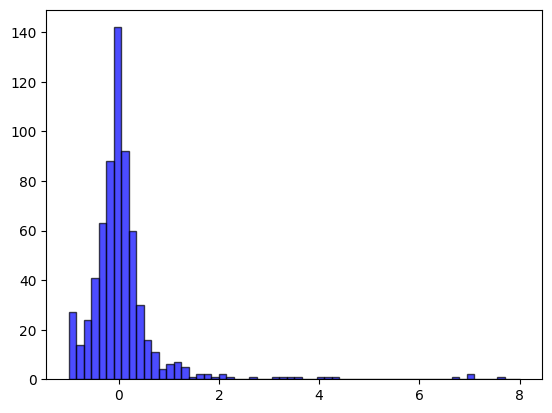

In [16]:
import matplotlib.pyplot as plt
import math

perc_error = ((decision_tree_full.predict(X_val) - Y_val)) / Y_val
print(perc_error)
plt.hist(perc_error, bins=60, alpha=0.7, color='blue', edgecolor='black', range=[min(perc_error), 8])

Now let us try the same tree with some feature selection given our EDA. We will select season, hour, and temperature.

In [17]:
selected_cols = ['Seasons', 'Hour', 'Temperature(°C)']

decision_tree_select = DecisionTreeRegressor(random_state=2489)

decision_tree_select.fit(X_train[selected_cols], Y_train)

cross_val_score(decision_tree_select, X_train, Y_train, cv=10)

pred = decision_tree_select.predict(X_val[selected_cols])

In [18]:
print(f'R_sq on validation set {decision_tree_select.score(X_val[selected_cols], Y_val)}')
print(f'R_sq on training set {decision_tree_select.score(X_train[selected_cols], Y_train)}')
print(f'Mean Absolute Error on validation set: {get_MAE(pred, Y_val)}')

R_sq on validation set 0.2768148551755294
R_sq on training set 0.9346599283393048
Mean Absolute Error on validation set: 331.8215859030837


Let's inspect the predictions

(array([  2.,   2.,   1.,   1.,   7.,   4.,   8.,  11.,  11.,  13.,  26.,
         42.,  82., 262.,  98.,  34.,  22.,   9.,  11.,  11.,   7.,   4.,
          6.,   1.,   2.,   2.,   0.,   0.,   1.,   1.]),
 array([-2392.        , -2215.43333333, -2038.86666667, -1862.3       ,
        -1685.73333333, -1509.16666667, -1332.6       , -1156.03333333,
         -979.46666667,  -802.9       ,  -626.33333333,  -449.76666667,
         -273.2       ,   -96.63333333,    79.93333333,   256.5       ,
          433.06666667,   609.63333333,   786.2       ,   962.76666667,
         1139.33333333,  1315.9       ,  1492.46666667,  1669.03333333,
         1845.6       ,  2022.16666667,  2198.73333333,  2375.3       ,
         2551.86666667,  2728.43333333,  2905.        ]),
 <BarContainer object of 30 artists>)

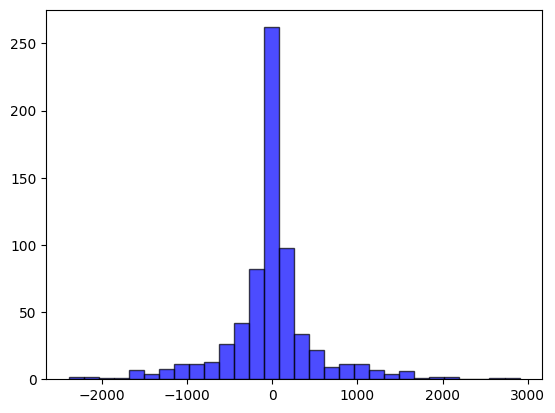

In [19]:
import matplotlib.pyplot as plt
plt.hist(pred - Y_val, bins=30, alpha=0.7, color='blue', edgecolor='black')

5366    0.203893
1147    0.233333
5705    0.195122
7518   -0.147392
2692   -0.282609
          ...   
6152   -0.645199
7550   -0.076690
8476    0.511364
828    -0.096552
6266   -0.613748
Name: Rented Bike Count, Length: 681, dtype: float64


(array([ 44.,  26.,  48.,  95., 120., 125.,  55.,  39.,  16.,   9.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

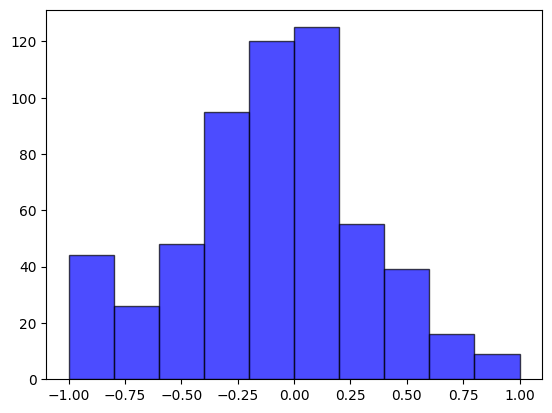

In [20]:
perc_error = ((decision_tree_select.predict(X_val[selected_cols]) - Y_val)) / Y_val
print(perc_error)
plt.hist(perc_error, bins=10, alpha=0.7, color='blue', edgecolor='black', range=[-1, 1])

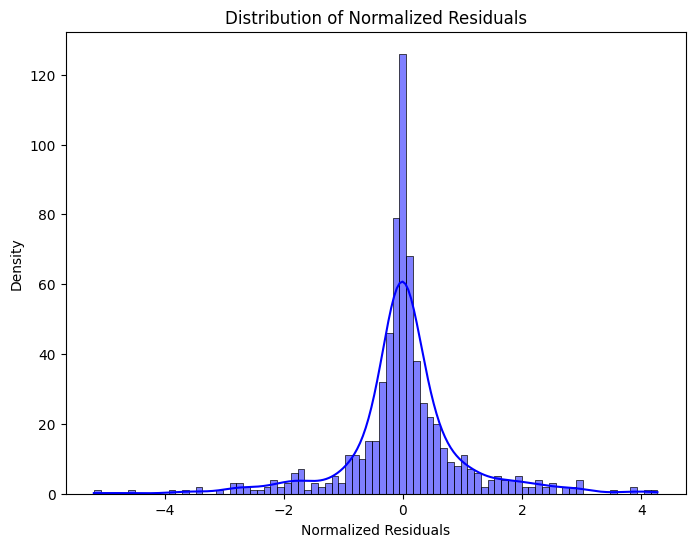

In [21]:
import seaborn as sns
# Calculate residuals
residuals = np.array(Y_val) - np.array(pred)

# Calculate normalized residuals
normalized_residuals = residuals / np.std(residuals)

# Create a plot of normalized residuals
plt.figure(figsize=(8, 6))
sns.histplot(normalized_residuals, kde=True, color='blue')
plt.xlabel('Normalized Residuals')
plt.ylabel('Density')
plt.title('Distribution of Normalized Residuals')
plt.show()

We see that having all features considered does best on the validation set. Now we will try a more complex model by creating boosted trees.

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

boosted_full = GradientBoostingRegressor(max_depth = 8, learning_rate = .1, random_state=0)
boosted_full.fit(X_train, Y_train)
preds_boost_full = boosted_full.predict(X_val)

In [23]:
print(f'R_sq on validation set {boosted_full.score(X_val, Y_val)}')
print(f'R_sq on training set {boosted_full.score(X_train, Y_train)}')
print(f'Mean Absolute Error on validation set: {get_MAE(preds_boost_full, Y_val)}')

R_sq on validation set 0.81763845857607
R_sq on training set 0.9647789449144308
Mean Absolute Error on validation set: 171.54708213054428


(array([  1.,   1.,   2.,   2.,   3.,   6.,  10.,  13.,  15.,  38.,  67.,
        131., 251.,  66.,  27.,  14.,   9.,   5.,   8.,   7.,   2.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-1339.55164838, -1229.81481815, -1120.07798792, -1010.34115769,
         -900.60432747,  -790.86749724,  -681.13066701,  -571.39383678,
         -461.65700655,  -351.92017632,  -242.18334609,  -132.44651586,
          -22.70968563,    87.0271446 ,   196.76397482,   306.50080505,
          416.23763528,   525.97446551,   635.71129574,   745.44812597,
          855.1849562 ,   964.92178643,  1074.65861666,  1184.39544688,
         1294.13227711,  1403.86910734,  1513.60593757,  1623.3427678 ,
         1733.07959803,  1842.81642826,  1952.55325849]),
 <BarContainer object of 30 artists>)

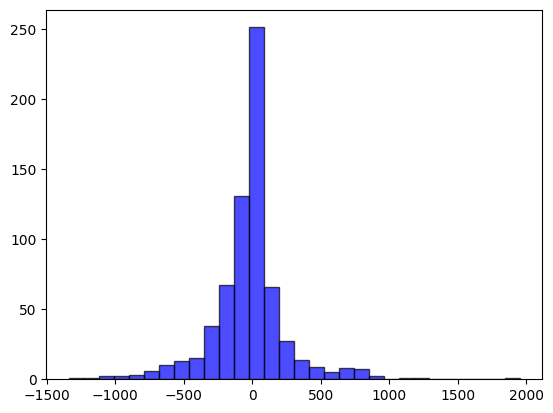

In [24]:
plt.hist(preds_boost_full - Y_val, bins=30, alpha=0.7, color='blue', edgecolor='black')

We see a significant improvement in the R^2 using a boosted tree, let us try feature selection on the boosted tree. Again, it turns out the feature selection does worse off. So let us continue with using all features.

In [25]:
boosted_select_model = GradientBoostingRegressor(random_state=0, max_depth = 5)
boosted_select_model.fit(X_train[selected_cols], Y_train)
preds_boost_select = boosted_select_model.predict(X_val[selected_cols])
boosted_select_model.score(X_val[selected_cols], Y_val)

0.606246763453228

In [26]:
print(f'R_sq on validation set {boosted_select_model.score(X_val[selected_cols], Y_val)}')
print(f'R_sq on training set {boosted_select_model.score(X_train[selected_cols], Y_train)}')
print(f'Mean Absolute Error on validation set: {get_MAE(preds_boost_select, Y_val)}')

R_sq on validation set 0.606246763453228
R_sq on training set 0.7152361705564345
Mean Absolute Error on validation set: 255.1354658508313


(array([  1.,   0.,   0.,   0.,   1.,   2.,   1.,   3.,   2.,  10.,  18.,
         21.,  57.,  75., 168., 179.,  45.,  29.,  15.,  10.,   8.,  11.,
          2.,   6.,   9.,   0.,   1.,   4.,   2.,   1.]),
 array([-2019.86334044, -1886.0722288 , -1752.28111715, -1618.49000551,
        -1484.69889386, -1350.90778222, -1217.11667057, -1083.32555893,
         -949.53444728,  -815.74333564,  -681.95222399,  -548.16111235,
         -414.3700007 ,  -280.57888906,  -146.78777741,   -12.99666577,
          120.79444588,   254.58555752,   388.37666917,   522.16778081,
          655.95889246,   789.7500041 ,   923.54111575,  1057.33222739,
         1191.12333904,  1324.91445068,  1458.70556233,  1592.49667397,
         1726.28778562,  1860.07889726,  1993.87000891]),
 <BarContainer object of 30 artists>)

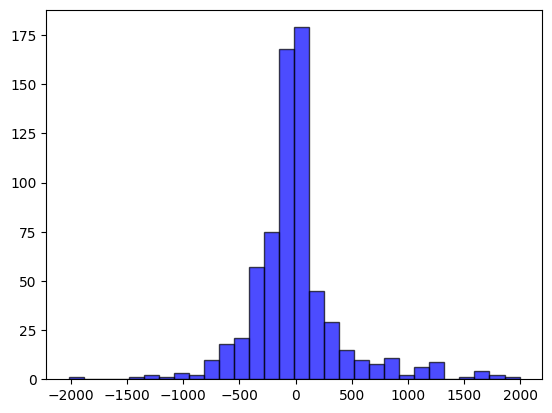

In [27]:
plt.hist(preds_boost_select - Y_val, bins=30, alpha=0.7, color='blue', edgecolor='black')

We can analyze the two boosted tree's feature importance

In [28]:
print(X_val.columns, '\n')

print(boosted_full.feature_importances_, '\n')

print(selected_cols)
print(boosted_select_model.feature_importances_)

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday'],
      dtype='object') 

[0.30318358 0.32552226 0.06899794 0.02231504 0.02822547 0.05018614
 0.10001685 0.05091395 0.00064095 0.04323503 0.00676279] 

['Seasons', 'Hour', 'Temperature(°C)']
[0.05414147 0.48124055 0.46461798]


In [29]:
dec_val_pred = decision_tree_full.predict(X_val)
boost_val_pred = boosted_full.predict(X_val)

dec_test_pred = decision_tree_full.predict(X_test)
boost_test_pred = boosted_full.predict(X_test)

In [30]:
def accuracy_within_range(pred, actual, threshold):
    thresh_perc = threshold / 100
    errors = np.abs(actual - pred)
    within_bounds = errors <= thresh_perc * np.abs(actual)
    accuracy = np.mean(within_bounds)
    return accuracy

In [31]:
# Set the threshold (e.g., 5%)
threshold_percent = 10

# Calculate accuracy
test_accuracy = accuracy_within_range(Y_val, dec_val_pred, threshold_percent)
print(f"Accuracy within {threshold_percent}% threshold for decision trees (validation): {test_accuracy * 100:.2f}%")

Accuracy within 10% threshold for decision trees (validation): 27.46%


In [32]:
# Set the threshold (e.g., 5%)
threshold_percent = 10

# Calculate accuracy
test_accuracy = accuracy_within_range(Y_val, boost_val_pred, threshold_percent)
print(f"Accuracy within {threshold_percent}% threshold for boosted trees (validation): {test_accuracy * 100:.2f}%")

Accuracy within 10% threshold for boosted trees (validation): 27.75%


In [33]:
# Set the threshold (e.g., 5%)
threshold_percent = 10

# Calculate accuracy
test_accuracy = accuracy_within_range(Y_test, dec_test_pred, threshold_percent)
print(f"Accuracy within {threshold_percent}% threshold for decision trees (test): {test_accuracy * 100:.2f}%")

Accuracy within 10% threshold for decision trees (test): 32.82%


In [34]:
# Set the threshold (e.g., 5%)
threshold_percent = 10

# Calculate accuracy
test_accuracy = accuracy_within_range(Y_test, boost_test_pred, threshold_percent)
print(f"Accuracy within {threshold_percent}% threshold for boosted decision trees (test): {test_accuracy * 100:.2f}%")

Accuracy within 10% threshold for boosted decision trees (test): 29.23%


Acc on val and test on worse tree models

In [43]:
select_pred_val = decision_tree_select.predict(X_val[selected_cols])
select_boost_pred_val = boosted_select_model.predict(X_val[selected_cols])

select_pred_test = decision_tree_select.predict(X_test[selected_cols])
select_boost_pred_test = boosted_select_model.predict(X_test[selected_cols])

In [44]:
# Calculate accuracy
test_accuracy = accuracy_within_range(Y_test, select_pred_test, threshold_percent)
print(f"Accuracy within {threshold_percent}% threshold for decision trees feature selection (test): {test_accuracy * 100:.2f}%")

Accuracy within 10% threshold for decision trees feature selection (test): 24.62%


In [45]:
# Calculate accuracy
val_acc = accuracy_within_range(Y_val, select_pred_val, threshold_percent)
print(f"Accuracy within {threshold_percent}% threshold for decision trees feature selection (val): {val_acc * 100:.2f}%")

Accuracy within 10% threshold for decision trees feature selection (val): 21.15%


In [49]:
# Calculate accuracy
test_accuracy = accuracy_within_range(Y_test, select_boost_pred_test, threshold_percent)
print(f"Accuracy within {threshold_percent}% threshold for boosted trees feature selection (test): {test_accuracy * 100:.2f}%")

Accuracy within 10% threshold for boosted trees feature selection (test): 25.13%


In [51]:
# Calculate accuracy
test_accuracy = accuracy_within_range(Y_val, select_boost_pred_val, threshold_percent)
print(f"Accuracy within {threshold_percent}% threshold for boosted trees feature selection (val): {test_accuracy * 100:.2f}%")

Accuracy within 10% threshold for boosted trees feature selection (val): 20.41%


### on test with various thresholds

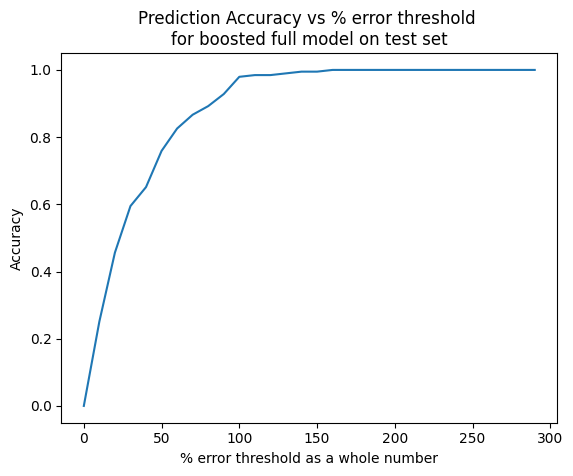

In [68]:
# Calculate accuracy
acc_on_thresh_forboosted = []
x_vals = []

for i in range (0, 300, 10):
  test_accuracy = accuracy_within_range(Y_test, select_boost_pred_test, i)
  x_vals.append(i)
  acc_on_thresh_forboosted.append(test_accuracy)

plt.plot(x_vals, acc_on_thresh_forboosted)
plt.xlabel('% error threshold as a whole number')
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy vs % error threshold \nfor boosted full model on test set')
plt.show()